# Исследование надежности заемщиков


**Описание проекта**  

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.  


**Описание данных**  

`children` — количество детей в семье  
`days_employed` — общий трудовой стаж в днях  
`dob_years` — возраст клиента в годах  
`education` — уровень образования клиента  
`education_id` — идентификатор уровня образования  
`family_status` — семейное положение   
`family_status_id` — идентификатор семейного положения  
`gender` — пол клиента  
`income_type` — тип занятости  
`debt` — имел ли задолженность по возврату кредитов  
`total_income` — ежемесячный доход  
`purpose` — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеки pandas. Чтение данные из csv-файла в датафрейм.**

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Информация о качестве возврата кредита (в срок) содержится в столбце:  
- debt — имел ли задолженность по возврату кредитов

Количество детей в семье содежрится в столбце:  
- children — количество детей в семье

days_employed — общий трудовой стаж в днях
dob_years — возраст клиента в годах
education — уровень образования клиента
education_id — идентификатор уровня образования
family_status — семейное положение
family_status_id — идентификатор семейного положения
gender — пол клиента
income_type — тип занятости
debt — имел ли задолженность по возврату кредитов
total_income — ежемесячный доход
purpose — цель получения кредита

Количество детей в имеющихся данных находится в пределах от 0 до 5.  
Оценим сколько записей для каждого количчества детей:

In [22]:
data['children'].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Клиентов с количеством детей 3, 4, 5 существенно меньше, чем в других категориях.  
Имется смысл проводить оценку для укрупненных групп. Т.е. необходимо сделать категоризацию по количеству детей.
Выделить следующие группы:  
- бездетные
- 1 ребёнок
- 2 ребёнка
- многодетные (3 или больше детей)

1 и 2 ребёнка может иметь разницу, поэтому исследуем отдельно

In [23]:
def ChildCategory(number_of_children):
    if number_of_children == 0:
        return 'бездетные'
    if number_of_children == 1:
        return '1 ребёнок'
    if number_of_children == 2:
        return '2 ребёнка'
    if number_of_children >= 3:
        return 'Многодетные'
    return 'Ошибка в данных о кол-ве детей'

In [24]:
#Результат категоризации - количество заёмщиков в каждой группе
data['children_category'] = data['children'].apply(ChildCategory)
data['children_category'].value_counts()

бездетные      14091
1 ребёнок       4808
2 ребёнка       2052
Многодетные      380
Name: children_category, dtype: int64

In [25]:
result_children = data[['children_category', 'debt']].copy()
result_children = result_children.groupby('children_category').agg({'debt':['count','sum']})
result_children['debt_rate'] = result_children['debt']['sum'] / result_children['debt']['count']
result_children['debt_rate'] *= 100 # %
result_children

debt       debt_rate
                   count   sum          
children_category                       
1 ребёнок           4808   444  9.234609
2 ребёнка           2052   194  9.454191
Многодетные          380    31  8.157895
бездетные          14091  1063  7.543822

- debt_count - Количество клиентов в категории
- debt_sum - Количество клиентов в категории, допустивших просрочки в оплате кредита
- debt_rate - % клиентов в категории, допустивших просрочки в оплате кредита  

Существенной разницы в оплате кредита в срок между категориями имеющих 1 или 2 детей не обнаружено. 
_Разница составила - 0,22%_  
Объеждимним категории "1 ребёнок" и "2 ребёнка".

In [26]:
# Объединим категории '1 ребёнок' и '2 ребёнка'
data.loc[(data['children_category'] == '1 ребёнок') | (data['children_category'] == '2 ребёнка'), 'children_category'] = '1 или 2 ребёнка'
result_children = data[['children_category', 'debt']].copy()
result_children = result_children.groupby('children_category').agg({'debt':['count','sum']})
result_children['debt_rate'] = result_children['debt']['sum'] / result_children['debt']['count']
result_children['debt_rate'] *= 100 # %
result_children.sort_values(by='debt_rate', ascending= False) # Отсортируем от худшего к лучшему

debt       debt_rate
                   count   sum          
children_category                       
1 или 2 ребёнка     6860   638  9.300292
Многодетные          380    31  8.157895
бездетные          14091  1063  7.543822

- debt_count - Количество клиентов в категории
- debt_sum - Количество клиентов в категории, допустивших просрочки в оплате кредита
- debt_rate - % клиентов в категории, допустивших просрочки в оплате кредита

**Вывод:** 
Существенной разницы в оплате кредита в срок между категориями имеющих 1 или 2 детей не обнаружено.  
Между другими категориями уже имеется существенная разница (более 1%), позволяющаяя сделать вывод о наличии взаимосвязи между выплатой кредита в срок и количеством детей.  
Наименее надежная категория: Имеющие ___"1 или 2 ребенка"___. Просрочки допускают **9,3%**  
Наиболее надёжная и наибольшая по численности категория: ___"Не имеющие детей"___. Просрочки допускают **7,54%**  
В наименьшей по численности категории ___"Многодетные"___ (_имеющие 3 и более детей_) допускают просрочки **8,15%** заёмщиков.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Интересуют столбцы:  
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- debt — имел ли задолженность по возврату кредитов  


In [27]:
result_family = data.groupby('family_status').agg({'family_status': ['count'], 'debt': ['sum']})
# Дополнительные столбцы с расчетами
result_family['debt_rate'] = result_family['debt']['sum'] / result_family['family_status']['count']
result_family['debt_rate'] *= 100 # %
result_family.sort_values(by= 'debt_rate', ascending= False) # Отсортируем от худшего к лучшему

,family_status,debt,debt_rate
,count,sum,
family_status,,,
Не женат / не замужем,2796,273,9.763948
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606


- family_status count - количество клиентов в категории
- debt sum - количество, допустивших просрочку по оплате
- debt_rate - % допустивших проскрочку в категории  

**Вывод:**  
Наихудшая статистика с возвратами кредитов в срок у тех, кто не был в официальном браке.  
Те, кто состоит в браке сотавляют самую многочисленную категорию.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для сравнения потребуется провести категоризацию по уровню дохода.

In [28]:
data['total_income'].max()

2265604

In [29]:
data['total_income'].min()

20667

In [30]:
data['total_income'].median()

142594.0

<AxesSubplot:xlabel='total_income'>

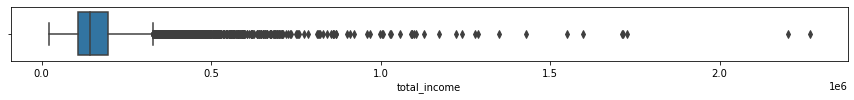

In [31]:
import seaborn
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 1) # указываем размер визуализации
seaborn.boxplot(x=data['total_income'])

Уровень дохода очень неравномерен.  
Для корректного сравнения нужно выделить равные группы.  
Последовательно разделим данные пополам с помощью 7 медиан до получения 8 частей.  
Получится по 2690 записей в категории.

In [32]:
min = data['total_income'].min()
max = data['total_income'].max()
median4 = data['total_income'].median()
median2 = data.loc[data['total_income'] <= median4]['total_income'].median()
median6 = data.loc[data['total_income'] > median4]['total_income'].median()
median1 = data.loc[data['total_income'] <= median2]['total_income'].median()
median3 = data.loc[(data['total_income'] > median2) & (data['total_income'] <= median4)]['total_income'].median()
median5 = data.loc[(data['total_income'] > median4) & (data['total_income'] <= median6)]['total_income'].median()
median7 = data.loc[data['total_income'] > median6]['total_income'].median()
print('Категория 1: от {:.0f} до {:.0f} руб.'.format(min, median1))
print('Категория 2: от {:.0f} до {:.0f} руб.'.format(median1, median2))
print('Категория 3: от {:.0f} до {:.0f} руб.'.format(median2, median3))
print('Категория 4: от {:.0f} до {:.0f} руб.'.format(median3, median4))
print('Категория 5: от {:.0f} до {:.0f} руб.'.format(median4, median5))
print('Категория 6: от {:.0f} до {:.0f} руб.'.format(median5, median6))
print('Категория 7: от {:.0f} до {:.0f} руб.'.format(median6, median7))
print('Категория 8: от {:.0f} до {:.0f} руб.'.format(median7, max))

Категория 1: от 20667 до 84094 руб.
Категория 2: от 84094 до 108050 руб.
Категория 3: от 108050 до 128317 руб.
Категория 4: от 128317 до 142594 руб.
Категория 5: от 142594 до 167504 руб.
Категория 6: от 167504 до 196642 руб.
Категория 7: от 196642 до 255092 руб.
Категория 8: от 255092 до 2265604 руб.


In [33]:
def IncomeCategory(total_income):
    if total_income <= median1:
        return 'Категория 1: от {:.0f} до {:.0f} руб.'.format(min, median1)
    if total_income <= median2:
        return 'Категория 2: от {:.0f} до {:.0f} руб.'.format(median1, median2)
    if total_income <= median3:
        return 'Категория 3: от {:.0f} до {:.0f} руб.'.format(median2, median3)
    if total_income <= median4:
        return 'Категория 4: от {:.0f} до {:.0f} руб.'.format(median3, median4)
    if total_income <= median5:
        return 'Категория 5: от {:.0f} до {:.0f} руб.'.format(median4, median5)
    if total_income <= median6:
        return 'Категория 6: от {:.0f} до {:.0f} руб.'.format(median5, median6)
    if total_income <= median7:
        return 'Категория 7: от {:.0f} до {:.0f} руб.'.format(median6, median7)
    return 'Категория 8: от {:.0f} до {:.0f} руб.'.format(median7, max)

In [34]:
#Результат категоризации - количество заёмщиков в каждой группе
data['income_category'] = data['total_income'].apply(IncomeCategory)
data['income_category'].value_counts()

Категория 3: от 108050 до 128317 руб.     2696
Категория 2: от 84094 до 108050 руб.      2696
Категория 1: от 20667 до 84094 руб.       2696
Категория 4: от 128317 до 142594 руб.     2695
Категория 8: от 255092 до 2265604 руб.    2637
Категория 5: от 142594 до 167504 руб.     2637
Категория 6: от 167504 до 196642 руб.     2637
Категория 7: от 196642 до 255092 руб.     2637
Name: income_category, dtype: int64

In [35]:
result_income = data.groupby('income_category').agg({'debt': ['count', 'sum']})
# Дополнительные столбцы с расчетами
result_income['debt_rate'] = result_income['debt']['sum'] / result_income['debt']['count']
result_income['debt_rate'] *= 100 # %
result_income.sort_values(by= 'income_category', ascending=True) # Отсортируем по возрастанию дохода

debt      debt_rate
                                       count  sum          
income_category                                            
Категория 1: от 20667 до 84094 руб.     2696  207  7.678042
Категория 2: от 84094 до 108050 руб.    2696  225  8.345697
Категория 3: от 108050 до 128317 руб.   2696  234  8.679525
Категория 4: от 128317 до 142594 руб.   2695  241  8.942486
Категория 5: от 142594 до 167504 руб.   2637  233  8.835798
Категория 6: от 167504 до 196642 руб.   2637  217  8.229048
Категория 7: от 196642 до 255092 руб.   2637  192  7.281001
Категория 8: от 255092 до 2265604 руб.  2637  183  6.939704

**Вывод:**
Самой ответственной является категория с наиболее высоким уровнем дохода - от 250 тысяч руб. и выше.  
Также более своевременно совершают платежи в самой низкой категориии - с доходом от 20 до 84 тыс. руб.  
Это может быть связано с более низкими суммами кредита или разницей в критериях одобрения кредита.  
В диапазоне 108 тысяч - 167 тысяч ситуация со своевремменностью платежей хуже всего и отличается до 2% от самых ответственных заёмщиков.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
result_purpose = data.groupby('purpose_category').agg({'purpose_category': ['count'],'debt': ['sum']})
# Дополнительные столбцы с расчетами
result_purpose['debt_rate'] = result_purpose['debt']['sum'] / result_purpose['purpose_category']['count'] * 100
result_purpose.sort_values(by= 'debt_rate', ascending= False) # Отсортируем по наихудшей возвращаемости

,purpose_category,debt,debt_rate
,count,sum,
purpose_category,,,
операции с автомобилем,4279,400,9.347978
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803
операции с недвижимостью,10751,780,7.255139


**Вывод:** 

Покупка автомобиля или образование - это те цели, при которых возврат кредита в срок более проблематичен.  
Наилучшая ситуация при операциях с недвижимостью. И в то же самое время это наибольшая доля заёмщиков.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

В данном случае можно обратить внимание на то, что есть симметрия в пропущенных данных. Количество пропущенных значений для дохода и для трудового стажа точно совпадает. Это может говорить о какой-то технической проблеме либо общей закономерности при подготовке или вводе данных.  
В общем случае причиной пропусков может быть не только техническая ошибка, но незаполнение данных по причине нежелания их указывать или отсутствия (что, например, может быть эквивалентно 0 - отсутствие стажа или дохода). Также такие пропуски могут зависеть от другой известно информации, например быть связанной с возрастной группой или уровнем дохода.

In [37]:
try:
    clients = pd.read_csv('/datasets/data.csv')
except:
    clients = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
clients.loc[clients['days_employed'].isna() & clients['total_income'].isna()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

На медианное значение меньше влияют выбросы и характер распределения значений. Поэтому замена на медианное значение дает меньшее искажение данных, чем заполнение средним значением. Но медиана не является единственным методом заполнения.

### Шаг 4: общий вывод.

Анализ проводился по данным из **21525 записей**.  

#### Пропущенный значения
Данные содержали **2174 пропущенных значения**  (**~1%** от всех данных) в столбцах **days_empoloyed** и **total_income**, причём было подтверждено, что пропуски в обоих колонках полностью совпадают.  
Пропущенные значения **total_income** были заполненны медианными значениями соответствующими типу занятости income_type.  
Пропущенные значения **days_empoloyed** были заполнены медианными значениями соответствующими типу занятости income_type.

#### Аномалии в данных
1) Отрицательное количество дней трудового стажа в столбце **days_employed**.  

Отрицательные значения заменены этими же положительными значениями.

2) У двух типов (безработные и пенсионеры) аномально большие значения трудового стажа **days_employed**.  

Эти данные оставлены, как есть.

3) В столбце children есть два аномальных значения: -1 и 20.

Строки, с аномальными значениями удалены (**193** записи).

#### Дубликаты
Удален **71** явный дубликат.

#### Ответы на попросы
По всем вопросам были получены ответы укзывающие на наличие исследуемых зависимостей.  

Сумарный краткий вывод:  
##### Зависимость между сроком возврата кредита и количеством детей: 

Были выделены следующие категории:
- бездетные
- 1 ребёнок
- 2 ребёнка
- Многодетные (3 и более детей)  

Как показал последующий анализ, существенной разницы между группами "1 ребёнок" и "2 ребёнка" нет. Поэтому количество групп было сокращено слиянием этих групп в одну.

In [38]:
result_children.sort_values(by='debt_rate', ascending= False) # Отсортируем от худшего к лучшему

debt       debt_rate
                   count   sum          
children_category                       
1 или 2 ребёнка     6860   638  9.300292
Многодетные          380    31  8.157895
бездетные          14091  1063  7.543822

- debt_count - Количество клиентов в категории
- debt_sum - Количество клиентов в категории, допустивших просрочки в оплате кредита
- debt_rate - % клиентов в категории, допустивших просрочки в оплате кредита

**Вывод:** 
Существенной разницы в оплате кредита в срок между категориями имеющих 1 или 2 детей не обнаружено.  
Между другими категориями уже имеется существенная разница (более 1%), позволяющаяя сделать вывод о наличии взаимосвязи между выплатой кредита в срок и количеством детей.  
Наименее надежная категория: Имеющие ___"1 или 2 ребенка"___. Просрочки допускают **9,3%**  
Наиболее надёжная и наибольшая по численности категория: ___"Не имеющие детей"___. Просрочки допускают **7,54%**  
В наименьшей по численности категории ___"Многодетные"___ (_имеющие 3 и более детей_) допускают просрочки **8,15%** заёмщиков.

##### Зависимость между семейным положением и возвратом кредита в срок:   

Использовались категории из данных.

In [39]:
result_family.sort_values(by= 'debt_rate', ascending= False) # Отсортируем от худшего к лучшему

,family_status,debt,debt_rate
,count,sum,
family_status,,,
Не женат / не замужем,2796,273,9.763948
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606


- family_status count - количество клиентов в категории
- debt sum - количество, допустивших просрочку по оплате
- debt_rate - % допустивших проскрочку в категории  

**Вывод:**  
Наихудшая статистика с возвратами кредитов в срок у тех, кто не был в официальном браке.  
Те, кто состоит в браке сотавляют самую многочисленную категорию.

##### Зависимость между уровнем дохода и возвратом кредита в срок:  
Как и ожидалось уровень дохода среди заёмщиков неравномерен.  
С целью сравнения равных по размеру групп данные по уровню дохода были разделены на 8 категорий в каждую из которых попало примерно равное количество записей. Это приводит к немного неудобному для чтения человеком результата. Но, при необходимости, можно на этой основе содать более человеко-читаемую категоризацию.

In [40]:
result_income.sort_values(by= 'income_category', ascending=True) # Отсортируем по возрастанию дохода

debt      debt_rate
                                       count  sum          
income_category                                            
Категория 1: от 20667 до 84094 руб.     2696  207  7.678042
Категория 2: от 84094 до 108050 руб.    2696  225  8.345697
Категория 3: от 108050 до 128317 руб.   2696  234  8.679525
Категория 4: от 128317 до 142594 руб.   2695  241  8.942486
Категория 5: от 142594 до 167504 руб.   2637  233  8.835798
Категория 6: от 167504 до 196642 руб.   2637  217  8.229048
Категория 7: от 196642 до 255092 руб.   2637  192  7.281001
Категория 8: от 255092 до 2265604 руб.  2637  183  6.939704

- debt count - количество клиентов в категории
- debt sum - количество, допустивших просрочку по оплате
- debt_rate - % допустивших проскрочку в категории  

**Вывод:**
Самой ответственной является категория с наиболее высоким уровнем дохода - от 250 тысяч руб. и выше.  
Также более своевременно совершают платежи в самой низкой категориии - с доходом от 20 до 84 тыс. руб.  
Это может быть связано с более низкими суммами кредита или разницей в критериях одобрения кредита.  
В диапазоне 108 тысяч - 167 тысяч ситуация со своевремменностью платежей хуже всего и отличается до 2% от самых ответственных заёмщиков.

##### Как разные цели кредита влияют на его возврат в срок:  
Категоризация на основе данных **purpose_category** путем выделения ключевых слов.

In [41]:
result_purpose.sort_values(by= 'debt_rate', ascending= False) # Отсортируем по наихудшей возвращаемости

,purpose_category,debt,debt_rate
,count,sum,
purpose_category,,,
операции с автомобилем,4279,400,9.347978
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803
операции с недвижимостью,10751,780,7.255139


- purpose_category count - количество клиентов в категории
- debt sum - количество, допустивших просрочку по оплате
- debt_rate - % допустивших проскрочку в категории  

**Вывод:**
Покупка автомобиля или образование - это те цели, при которых возврат кредита в срок более проблематичен.  
Наилучшая ситуация при операциях с недвижимостью. И в то же самое время это наибольшая доля заёмщиков.